# Телеметрия январь 2021

In [1]:
!pwd
!date
!ls *.dat

/home/alena/SCIENCE/SIT/Analysis/Telemetry
Ср фев 10 14:40:50 MSK 2021
2020_12_29_all_dbg_params.dat  2021_01_all_dbg_params.dat
2020_12_all_dbg_params.dat     2021_02_part_all_dbg_params.dat


In [25]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp
from matplotlib import dates
import datetime as dt

In [3]:
plt.rcParams['figure.figsize'] =(8,4)
plt.rcParams['lines.markersize'] = 3.5
plt.rcParams['lines.markeredgewidth'] = 1
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['grid.alpha'] = 0.7
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['font.size'] = 14

In [4]:
filename = "2021_01_all_dbg_params.dat"
data = pd.read_csv(filename, index_col=None, sep='\s+')
print(data.shape)
print(data.columns)
data.head()

(21169, 20)
Index(['year', 'month', 'day', 'time', 'P0', 'T0', 'P1', 'T1', 'Tmos', 'Umos',
       'Imos', 'Tpow', 'U5', 'Uac', 'Icom', 'Tbot', 'Ttop', 'Freq', 'Num',
       'flight'],
      dtype='object')


,year,month,day,time,P0,T0,P1,T1,Tmos,Umos,Imos,Tpow,U5,Uac,Icom,Tbot,Ttop,Freq,Num,flight
0,2021,1,8,18:28:44,96.24,21.0,95.99,-20.5,-7.2,0.0,-0.005,29.25,5.15,18.90,0.95,18.2,18.9,1.0,108.0,NaN
1,2021,1,8,18:28:44,96.25,21.0,96.00,-20.5,-7.3,0.0,0.010,29.25,5.15,18.91,0.88,18.2,18.9,2.0,108.0,NaN
2,2021,1,8,18:29:46,96.25,21.1,96.00,-20.5,-7.4,0.0,-0.005,29.25,5.15,18.91,0.91,18.4,18.9,3.0,108.0,NaN
3,2021,1,8,18:30:47,96.25,21.1,96.01,-20.5,-7.4,0.0,0.000,29.75,5.15,18.91,0.89,18.5,19.0,4.0,108.0,NaN
4,2021,1,8,18:31:48,96.25,21.1,95.98,-20.5,-7.5,0.0,0.005,29.75,5.15,18.90,0.92,18.6,19.0,5.0,108.0,NaN


## Plot

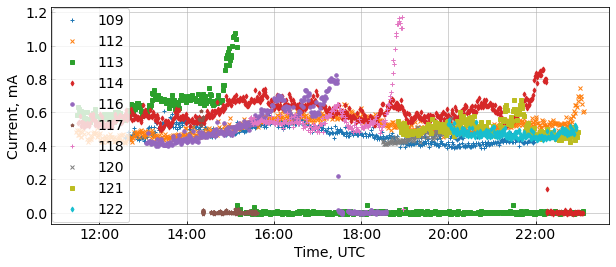

In [6]:
def plot_by_days(array, param, axistext, titletext='', axis=None):
    plcol = ['+','x', 's', 'd', 'o', '*']

    data = array
    if param == 'Tmos':
        data = array[(array[param] < 50)]

    if axis == None:
        fig, ax = plt.subplots(figsize=(10,4))
    else:
        fig, ax = axis

    i = 0
    for key, grp in data.groupby(['flight']):
        x = [dt.datetime.strptime(i, "%H:%M:%S") for i in (grp.time)]
        y = grp[param]
        key=int(key)
        ax.plot(x, y, plcol[i%len(plcol)], label=key)
        i += 1

    plt.xlabel("Time, UTC")
    plt.ylabel(axistext)
    fmt = dates.DateFormatter('%H:%M')
    ax.xaxis.set_major_formatter(fmt)
    ax.set_title(titletext)
    plt.legend(borderaxespad=0.1)
    plt.grid()
    #plt.savefig("sit_current_2020_12.png", dpi=300,  bbox_inches='tight')
    
plot_by_days(data, "Imos", "Current, mA")    

## Plot shared axis

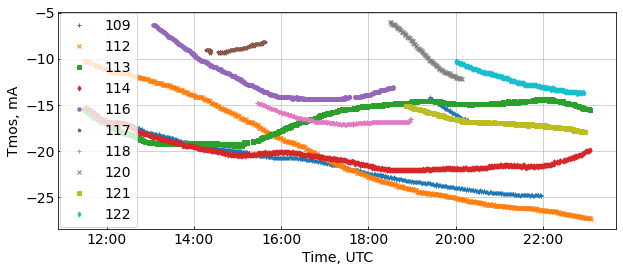

In [7]:
def plot_by_days(array, param, axistext, titletext='', axis=None):
    plcol = ['+','x', 's', 'd', 'o', '*']

    data = array
    if param == 'Tmos':
        data = array[(array[param] < 50)]

    if axis == None:
        fig, ax = plt.subplots(figsize=(10,4))
    else:
        ax = axis

    i = 0
    for key, grp in data.groupby(['flight']):
        x = [dt.datetime.strptime(i, "%H:%M:%S") for i in (grp.time)]
        y = grp[param]
        ax.plot(x, y, plcol[i%len(plcol)], label=str(int(key)))
        i += 1

    plt.xlabel("Time, UTC")
    ax.set_ylabel(axistext)
    fmt = dates.DateFormatter('%H:%M')
    ax.xaxis.set_major_formatter(fmt)
    ax.set_title(titletext)
    ax.legend(borderaxespad=0.1)
    ax.grid()
    #plt.savefig("sit_current_2020_12.png", dpi=300,  bbox_inches='tight')
    
plot_by_days(data, "Tmos", "Tmos, mA")    

In [ ]:
params = ['T0', 'T1', 'Tmos', 'Tbot', 'Ttop', 'Imos','Freq']
figs = len(params)
fig, axn = plt.subplots(figs, 1, sharex=True,  figsize=(10, 4*figs))

for i, param in enumerate(params):
    plot_by_days(data, param, param, param, axn[i]) 
#plt.savefig("2020_12_sit_telemetry.png", dpi=300,  bbox

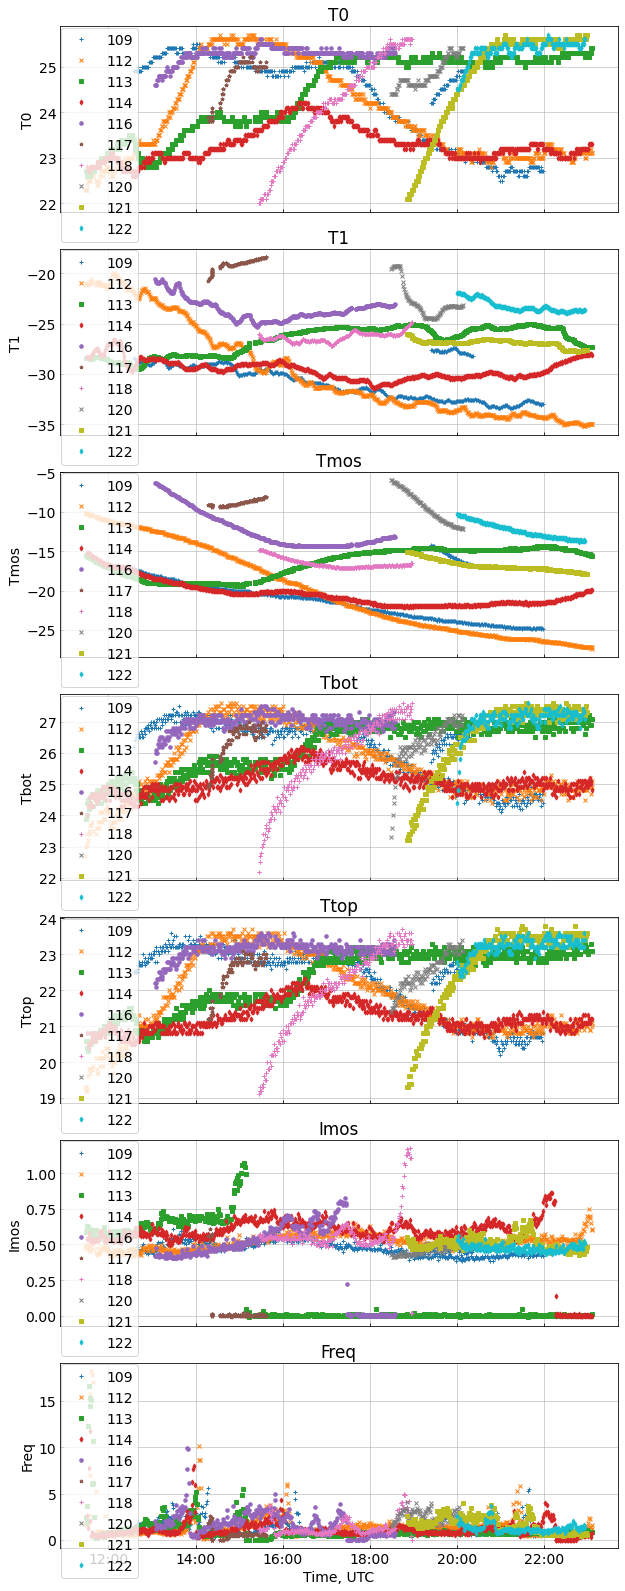

In [10]:
#params = data.columns[4:-2]
#params = ['T0', 'T1', 'Tmos', 'Tpow', 'Tbot', 'Ttop', 'U5', 'Uac', 'Icom', 'Imos','Freq']
params = ['T0', 'T1', 'Tmos', 'Tbot', 'Ttop', 'Imos','Freq']
figs = len(params)
fig, axn = plt.subplots(figs, 1, sharex=True,  figsize=(10, 4*figs))

for i, param in enumerate(params):
    plot_by_days(data, param, param, param, axn[i]) 
#plt.savefig("2020_12_sit_telemetry.png", dpi=300,  bbox_inches='tight')

109.0
(693596.5045752315, 693596.9348229166)
112.0
(693596.4536851852, 693596.9867777778)
113.0
(693596.4544311342, 693596.986390625)
114.0
(693596.4558784723, 693596.9862974536)
116.0
(693596.5331116898, 693596.7854878472)
117.0
(693596.5924924768, 693596.6537690973)
118.0
(693596.6365642361, 693596.7977065971)
120.0
(693596.7671082176, 693596.8424403935)
121.0
(693596.7769780093, 693596.9656840279)
122.0
(693596.8273657407, 693596.9617083333)


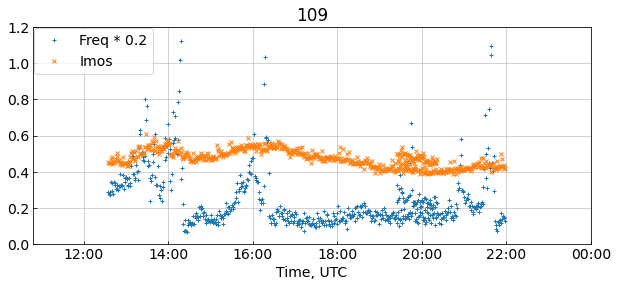

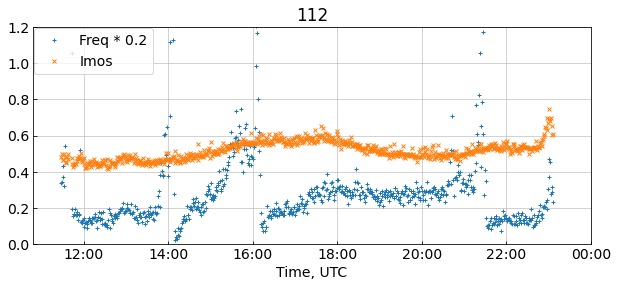

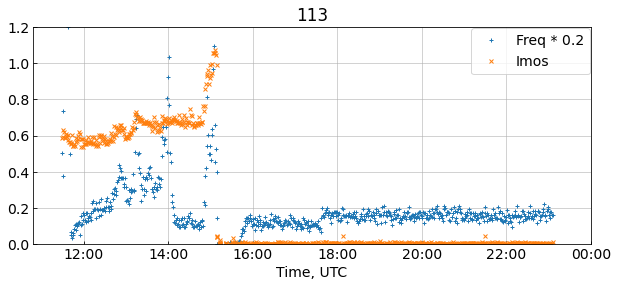

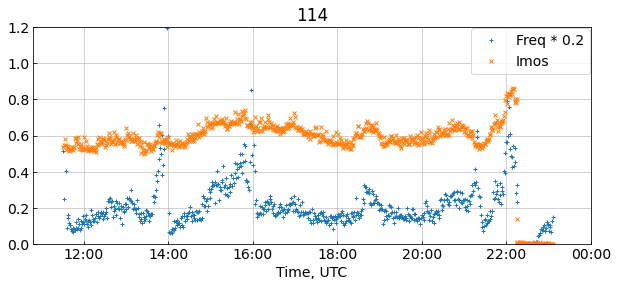

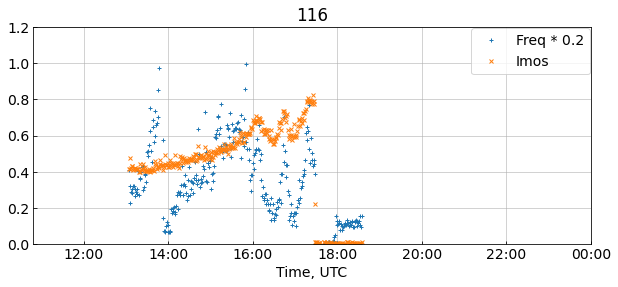

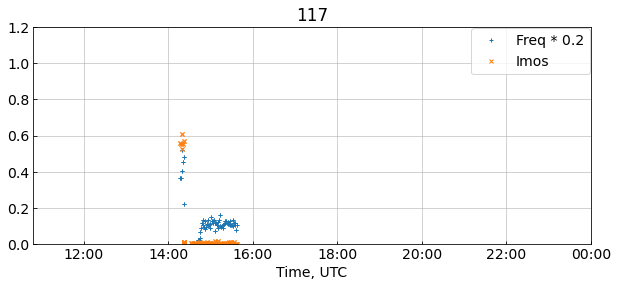

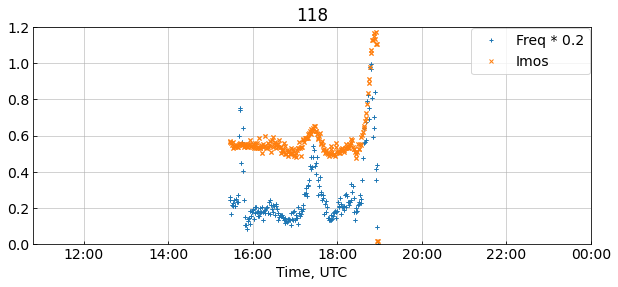

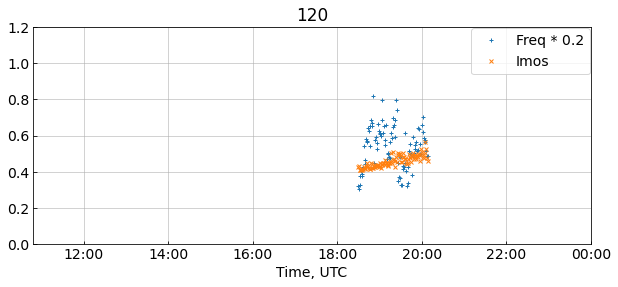

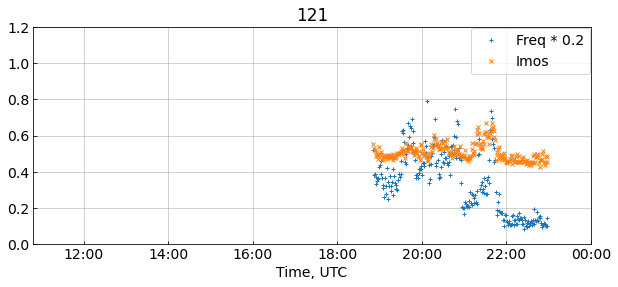

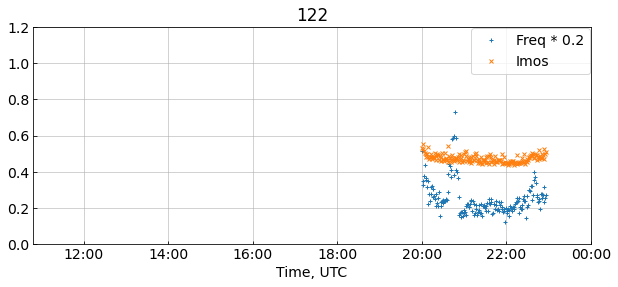

In [23]:
def plot_freq_for_days(array, flight, axistext, titletext=''):
    fmt = dates.DateFormatter('%H:%M')
    plcol = ['+','x', 's', 'd', 'o', '*']
    #plcol = ['+-','x-', 's-', 'd-', 'o-', '*-']
    #plcol = ['m+','bx', 'gs', 'rd', 'co', 'y*']
    #plcol = ['m+-','bx--', 'gs:', 'rd-.', 'co-', 'k*-']

    grp = array[array.flight == flight]
    fig, ax = plt.subplots(figsize=(10,4))
    
    FreqCoef = 0.2
    i = 0
    for param in ['Freq', 'Imos']:
        x = [dt.datetime.strptime(i, "%H:%M:%S") for i in (grp.time)]
        y = grp[param]
        label=param
        if param == 'Freq':
            y *= FreqCoef
            label = param + ' * ' + str(FreqCoef)
        ax.plot(x, y, plcol[i%len(plcol)], label=label)
        i += 1

    plt.xlabel("Time, UTC")
    plt.ylabel(axistext)
    ax.xaxis.set_major_formatter(fmt)
    titletext = str(int(titletext))
    ax.set_title(titletext)
    plt.ylim(0.0, 1.2)
    #plt.xlim()
    print(ax.get_xlim())
    #ax.set_xlim(np.array([-0.1, 0.1])+ax.get_xlim())
    ax.set_xlim((693596.45,693597))

    plt.legend(borderaxespad=0.1)
    plt.grid()
    #plt.savefig("Temperature_2020_" + titletext + ".png", dpi=300,  bbox_inches='tight')
    

for key, grp in (data.groupby(['flight'])):
    print(key)
    plot_freq_for_days(grp, key, "", key)

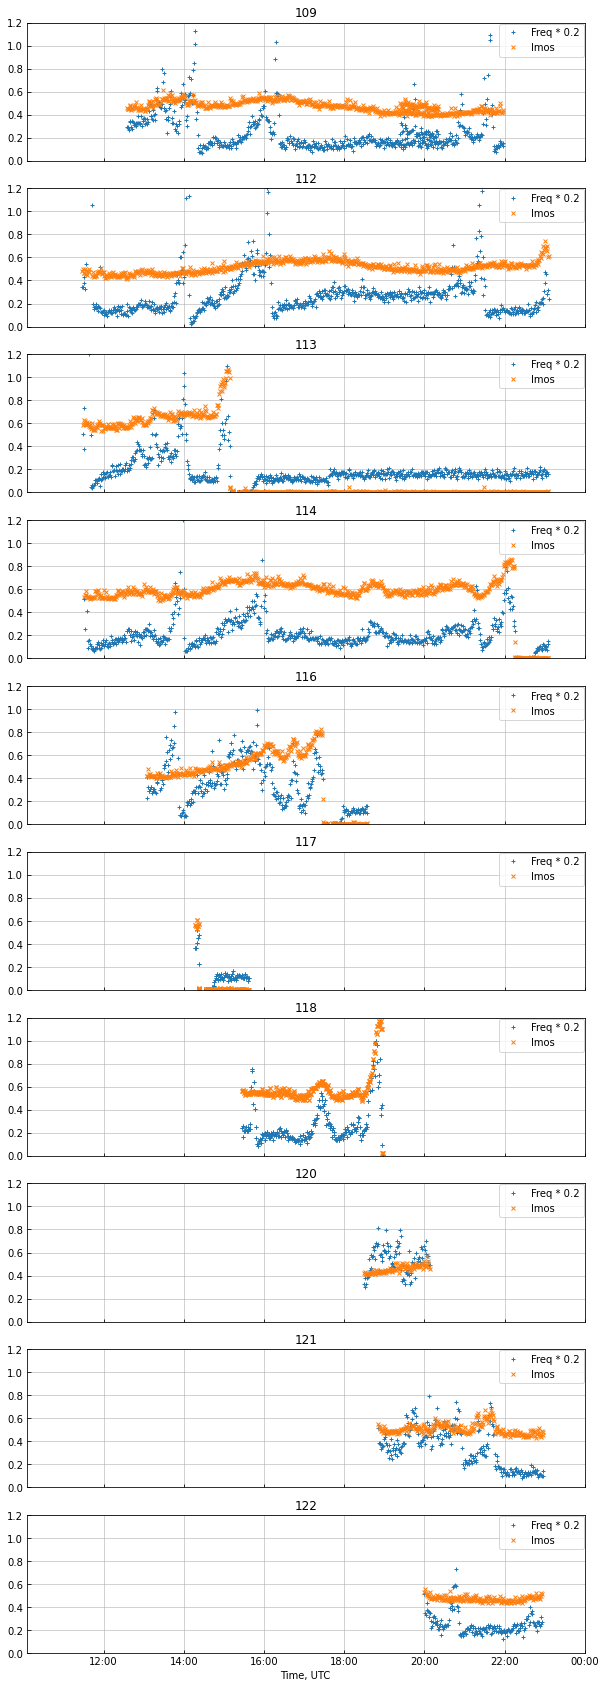

In [27]:
def plot_freq_and_imos_for_days(array, flight, axistext, titletext='', axis=None):
    fmt = dates.DateFormatter('%H:%M')
    plcol = ['+','x', 's', 'd', 'o', '*']

    grp = array[array.flight == flight]
    grp = grp[(np.isnan(grp.Freq)) == False]
    x = [dt.datetime.strptime(i, "%H:%M:%S") for i in (grp.time)]
    if(len(x) == 0):
        return
    
    if axis == None:
        fig, ax = plt.subplots(figsize=(10,4))
    else:
        ax = axis
    
    FreqCoef = 0.2
    i = 0
    for param in ['Freq', 'Imos']:
        x = [dt.datetime.strptime(i, "%H:%M:%S") for i in (grp.time)]
        y = grp[param]
        label=param
        if param == 'Freq':
            y *= FreqCoef
            label = param + ' * ' + str(FreqCoef)
        ax.plot(x, y, plcol[i%len(plcol)], label=label)
        i += 1

    #ax.set_xlabel("Time, UTC")
    ax.set_ylabel(axistext)
    ax.xaxis.set_major_formatter(fmt)
    titletext = str(int(titletext))
    ax.set_title(titletext)
    ax.set_ylim(0., 1.2)
    ax.set_xlim((693596.42,693597))    
    ax.legend(borderaxespad=0.1)
    ax.grid()


########################    
flights = [109, 112, 113, 114, 116, 117,118,120, 121, 122] 
figs = len(flights)
fig, axn = plt.subplots(figs, 1, sharex=True,  figsize=(10, 3 * figs))

for i, key in enumerate(flights):
    plot_freq_and_imos_for_days(data, key, "", key, axn[i])
plt.xlabel("Time, UTC")
plt.savefig("2021_01_curr_and_freq.png", dpi=300,  bbox_inches='tight')